In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Red_1 = "Diego"
Red_2 = "Agus"
Red_3 = "lion"
results_dir_fmt = "results/analysis_2/{red}_{file}"

In [3]:
def load_dfs_by_red(red):
    prot_perc = pd.read_csv(results_dir_fmt.format(red=red, file="protocol_percentage.csv"))

    symbol_freq = pd.read_csv(results_dir_fmt.format(red=red, file="symbol_frequency.csv"))

    info = pd.read_csv(results_dir_fmt.format(red=red, file="information.csv"))

    entropy = pd.read_csv(results_dir_fmt.format(red=red, file="entropy.csv"))
    
    return (prot_perc, symbol_freq, info, entropy)
    

In [4]:
def my_autopct(pct):
    return None

def parsePercent(p):
    return '%1.1f' % p

In [5]:
def draw_pie(_df, outputname):
    patches = plt.pie(_df["value"], labels = None, autopct=my_autopct, pctdistance=0.7)
    labels = []
    i = 0
    for p in patches[2]: 
        labels += ["{} - {}%".format(_df.iloc[i].type, parsePercent(_df.iloc[i].value*100))]
        i += 1 

    plt.legend(labels, bbox_to_anchor=(0.5,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
    plt.savefig('./results/analysis_2/imgs/s2_{}.svg'.format(outputname))#,bbox_inches="tight")
    plt.tight_layout()
    plt.show()


In [6]:
def draw_info_by_proto(_df_info, red, _df_entropy, outputname):
    plt.bar(_df_info["type"], _df_info["value"])
    plt.xlabel("Protocolo")
    plt.ylabel("Information")

    entropy = _df_entropy[_df_entropy["dataset"]==red]["value"].item()
    plt.axhline(y=entropy, color='r', linestyle='-')
#    plt.rcParams["figure.figsize"] = (12,5)
    entropy_str = "{:.4f}".format(entropy)
    plt.text( x = -1.6, y = entropy+0.05, s = 'Entropia: '+ str(entropy_str))
    plt.xticks(rotation=40, ha='right')
    plt.tight_layout()
    plt.savefig('./results/analysis_2/imgs/s2_{}.svg'.format(outputname), bbox_inches='tight')
    plt.show()


# Read source - Red 1

In [7]:
df_Red_1 = pd.read_csv("Capturas_csv/" + Red_1 +".csv")
df_Red_1_prot_perc, df_Red_1_symbol_freq, df_Red_1_info, df_Red_1_entropy = load_dfs_by_red(Red_1)


# Read source - Red 2

In [8]:
df_Red_2 = pd.read_csv("Capturas_csv/" + Red_2 +".csv")
df_Red_2_prot_perc, df_Red_2_symbol_freq, df_Red_2_info, df_Red_2_entropy = load_dfs_by_red(Red_2)

# Read source - Red 3

In [9]:
df_Red_3 = pd.read_csv("Capturas_csv/" + Red_3 +".csv")
df_Red_3_prot_perc, df_Red_3_symbol_freq, df_Red_3_info, df_Red_3_entropy = load_dfs_by_red(Red_3)

# Merge entropy - Red 1, Red 2, Red 3

In [142]:
df_entropy = pd.concat([df_Red_1_entropy, df_Red_2_entropy, df_Red_3_entropy])
df_entropy

,dataset,value
0,Diego,0.701811
0,Agus,1.191171
0,lion,1.257434


In [143]:
df_Red_2_prot_perc

,type,value
0,192.168.0.36,75.176305
1,192.168.0.78,11.424542
2,192.168.0.1,11.142454
3,192.168.0.8,1.128350
4,192.168.0.47,0.282087
5,0.0.0.0,0.282087
6,192.168.0.221,0.282087
7,192.168.0.79,0.141044
8,192.168.0.125,0.141044


# Informacion por protocolo - Red 1

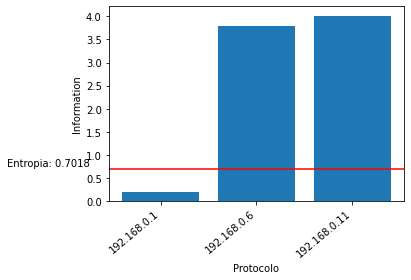

In [144]:
draw_info_by_proto(df_Red_1_info, Red_1, df_Red_1_entropy, "red_1_info")


# Informacion por protocolo - Red 2

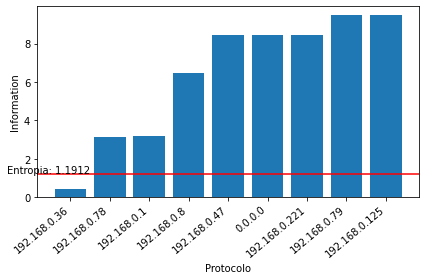

In [145]:
draw_info_by_proto(df_Red_2_info, Red_2, df_Red_2_entropy, "red_2_info")


# Informacion por protocolo - Red 3

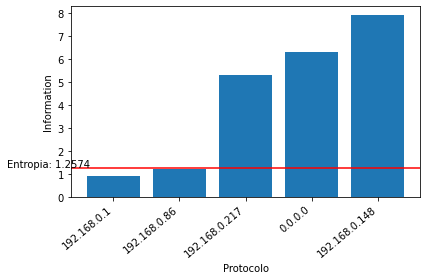

In [146]:
draw_info_by_proto(df_Red_3_info, Red_3, df_Red_3_entropy, "red_3_info")


# Porcentaje tráfico Red 1

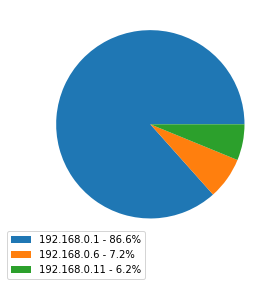

In [308]:
draw_pie(df_Red_1_symbol_freq, "red_1_hosts")

In [303]:
df_Red_3_symbol_freq["p"] =  df_Red_3_symbol_freq['value']/df_Red_3_symbol_freq['value'].sum()
df_Red_3_symbol_freq

,type,value,p
0,192.168.0.1,0.525210,0.525210
1,192.168.0.86,0.432773,0.432773
2,192.168.0.217,0.025210,0.025210
3,0.0.0.0,0.012605,0.012605
4,192.168.0.148,0.004202,0.004202


# Porcentaje tráfico Red 2

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_87562/3924494016.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches = plt.pie(_df["value"], labels = None, autopct=my_autopct, pctdistance=0.7)


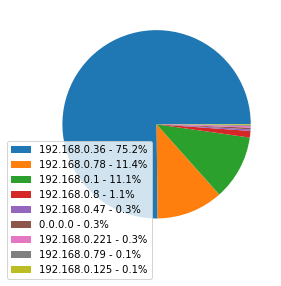

In [309]:
draw_pie(df_Red_2_symbol_freq, "red_2_hosts")

# Porcentaje tráfico Red 3

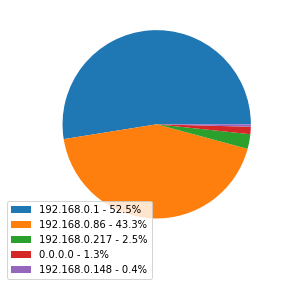

In [310]:
draw_pie(df_Red_3_symbol_freq, "red_3_hosts")

In [306]:
df_Red_3_symbol_freq["p"] =  df_Red_3_symbol_freq['value']/df_Red_3_symbol_freq['value'].sum()
df_Red_3_symbol_freq

,type,value,p
0,192.168.0.1,0.525210,0.525210
1,192.168.0.86,0.432773,0.432773
2,192.168.0.217,0.025210,0.025210
3,0.0.0.0,0.012605,0.012605
4,192.168.0.148,0.004202,0.004202
